In [1]:
from UTILITY_quickstart import *  
from tabulate import tabulate


importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")  

#New DL10 centering 
importedDefaultSettings = importedDefaultSettings | {"centerDL10" : True}

#Disable BC14 centering
importedDefaultSettings = importedDefaultSettings | { "centerBC14" : False }

In [2]:
csrTF = False #This config is intended for use with CSR on... but for speed, running this notebook with it off
transverseWakes = False #Initially disabling for faster computation

evalElement = "BEGBC20"   
inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"] 
bunchCount = importedDefaultSettings["bunchCount"] 

tao = initializeTao(     
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,          
    csrTF = csrTF,     
    numMacroParticles=1e3,     
    scratchPath = "/tmp",     
    randomizeFileNames = True,      
    transverseWakes = transverseWakes 
)


totalNumElements = len(tao.lat_list("*", "ele.name"))

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 1000.0
Beam created, written to /tmp/beams/activeBeamFile_14685102052444413911.h5, and reinit to tao


In [3]:
combinedElementData = [
    {
        "eleII" : eleII,
        "name" : tao.ele_head(eleII)["name"],
        "key" : tao.ele_head(eleII)["key"],
        "s" : tao.ele_head(eleII)["s"]
    }
    for eleII in range(totalNumElements) 
]

#Keep only elements after L0AFEND
combinedElementData = [ele for ele in combinedElementData if ele["s"] > 4.1274477]

allHKickerNames = [ele["name"] for ele in combinedElementData if ele["key"] == "HKicker"]
allVKickerNames = [ele["name"] for ele in combinedElementData if ele["key"] == "VKicker"]

#Manually picking a list of elements that seem like BPMs. Fast and dirty, DNT
#[ele["name"] for ele in combinedElementData if ele["key"] == "Monitor"]
allBPMNames = ['BPM10371', 'BPM10425', 'BPM10511', 'BPM10525',  'BPM10581', 'BPM10631', 'BPM10651', 'BPM10731', 'BPM10771', 'BPM10781', 'BPM11132', 'BPM11201', 'BPM11265', 'BPM11301', 'BPM11312', 'BPM11333', 'BPM11358', 'BPM11362', 'BPM11393', 'BPM11401', 'BPM11501', 'BPM11601', 'BPM11701', 'BPM11801', 'BPM11901', 'BPM12201', 'BPM12301', 'BPM12401', 'BPM12501', 'BPM12601', 'BPM12701', 'BPM12801', 'BPM12901', 'BPM13201', 'BPM13301', 'BPM13401', 'BPM13501', 'BPM13601', 'BPM13701', 'BPM13801', 'BPM13901', 'BPM14201', 'BPM14301', 'BPM14401', 'BPM14501', 'BPM14601', 'BPM14701', 'BPM14715', 'BPM14801', 'BPM14891', 'BPM14901', 'BPM15201', 'BPM15301', 'BPM15401', 'BPM15501', 'BPM15601', 'BPM15701', 'BPM15801', 'BPM15901', 'BPM16201', 'BPM16301', 'BPM16401', 'BPM16501', 'BPM16601', 'BPM16701', 'BPM16801', 'BPM16901', 'BPM17201', 'BPM17301', 'BPM17401', 'BPM17501', 'BPM17601', 'BPM17701', 'BPM17801', 'BPM17901', 'BPM18201', 'BPM18301', 'BPM18401', 'BPM18501', 'BPM18601', 'BPM18701', 'BPM18801', 'BPM18901', 'BL18900', 'BPM19201', 'BPM19301', 'BPM19401', 'BPM19801', 'BPM19851', 'BPM19871', 'M1E', 'M3E', 'MS2EL', 'M4E', 'M5E', 'M6E', 'M7E', 'M8E', 'MS2ER', 'M9E', 'M11E', 'M1FF', 'M2FF', 'M3FF', 'M4FF', 'M5FF', 'M0EX', 'M1EX', 'M2EX', 'M3EX']

In [4]:
#Make sure tracked beam is available at all BPMs
#Doing this in a loop because Bmad sometimes gets weird about long lists...
for ele in allBPMNames:
    tao.cmd(f"set beam add_saved_at = {ele}")

## An aside on coordinates

In [5]:
# print( tao.ele_orbit("BEGBC20") )
# print( tao.ele_floor("BEGBC20") )
# tao.cmd("set ele BEGBC20 X_OFFSET = 0.001")
# print( tao.ele_orbit("BEGBC20") )
# print( tao.ele_floor("BEGBC20") )

# tao.cmd("show ele BEGBC20 -all")

In [6]:
# tao.cmd("show ele Q6E -all")

In [7]:
# print( tao.ele_orbit("Q6E") )
# print( tao.ele_floor("Q6E") )
# tao.cmd("set ele Q6E X_OFFSET = 0.001")
# print( tao.ele_orbit("Q6E") )
# print( tao.ele_floor("Q6E") )

# tao.cmd("show ele Q6E -all")

In [8]:
tao.ele_orbit("Q6E")["x"] - (tao.ele_floor("Q6E")["Actual"][0] - tao.ele_floor("Q6E")["Reference"][0])

5.88805290987401e-16

## Reference

In [9]:
setLattice(tao, **importedDefaultSettings)

In [10]:
trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_14685102052444413911.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_14685102052444413911.h5
Loaded /tmp/beams/patchBeamFile_14685102052444413911.h5
Set track_start = ENDDL10, track_end = BEGBC20
Tracking!
trackBeam() exiting


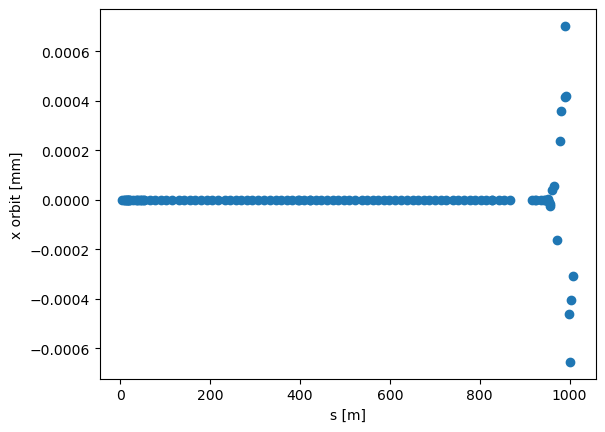

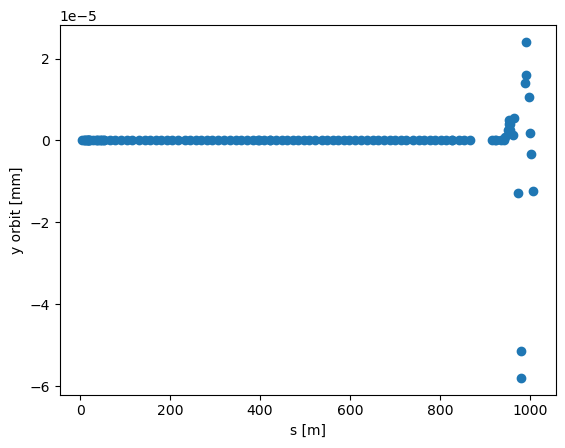

In [11]:
fig, ax = plt.subplots()
# ax.scatter(
#     [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
#     [ tao.ele_orbit(eleII)["x"] for eleII in range(totalNumElements) ]
# )
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    #[ tao.ele_orbit(ele)["x"] for ele in allBPMNames ]
    [tao.ele_orbit(ele)["x"] - (tao.ele_floor(ele)["Actual"][0] - tao.ele_floor(ele)["Reference"][0]) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()


fig, ax = plt.subplots()
# ax.scatter(
#     [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
#     [ tao.ele_orbit(eleII)["y"] for eleII in range(totalNumElements) ]
# )
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    #[ tao.ele_orbit(ele)["y"] for ele in allBPMNames ]
    [tao.ele_orbit(ele)["y"] - (tao.ele_floor(ele)["Actual"][1] - tao.ele_floor(ele)["Reference"][1]) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("y orbit [mm]")
plt.show()

In [12]:
#Perturb something just to check effect
tao.cmd(f"set ele Q11801 X_OFFSET = 0.001")
tao.cmd(f"set ele Q11801 Y_OFFSET = 0.0007")

[]

In [13]:
trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_14685102052444413911.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_14685102052444413911.h5
Loaded /tmp/beams/patchBeamFile_14685102052444413911.h5
Set track_start = ENDDL10, track_end = BEGBC20
Tracking!
trackBeam() exiting


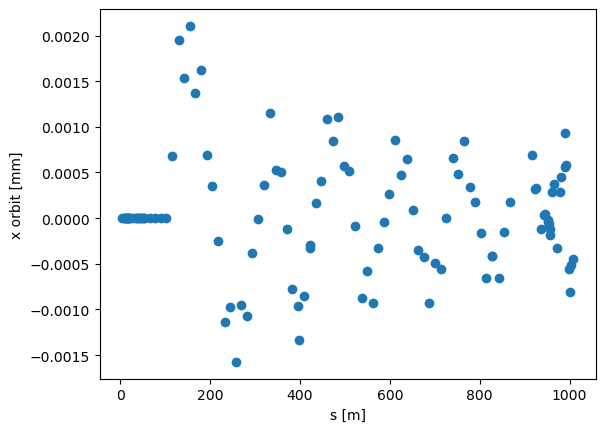

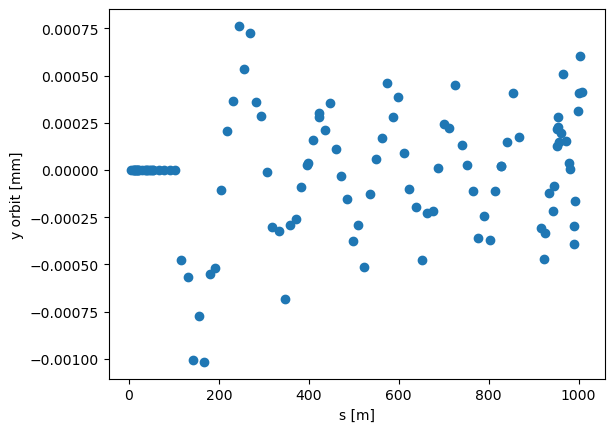

In [14]:
fig, ax = plt.subplots()
# ax.scatter(
#     [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
#     [ tao.ele_orbit(eleII)["x"] for eleII in range(totalNumElements) ]
# )
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    #[ tao.ele_orbit(ele)["x"] for ele in allBPMNames ]
    [tao.ele_orbit(ele)["x"] - (tao.ele_floor(ele)["Actual"][0] - tao.ele_floor(ele)["Reference"][0]) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()


fig, ax = plt.subplots()
# ax.scatter(
#     [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
#     [ tao.ele_orbit(eleII)["y"] for eleII in range(totalNumElements) ]
# )
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    #[ tao.ele_orbit(ele)["y"] for ele in allBPMNames ]
    [tao.ele_orbit(ele)["y"] - (tao.ele_floor(ele)["Actual"][1] - tao.ele_floor(ele)["Reference"][1]) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("y orbit [mm]")
plt.show()

## Develop solver

In [15]:
from scipy.optimize import minimize
from scipy.optimize import lsq_linear

In [16]:
def getActualXOffset(tao, ele):
    return tao.ele_orbit(ele)["x"] - (tao.ele_floor(ele)["Actual"][0] - tao.ele_floor(ele)["Reference"][0])

def getActualYOffset(tao, ele):
    return tao.ele_orbit(ele)["y"] - (tao.ele_floor(ele)["Actual"][1] - tao.ele_floor(ele)["Reference"][1])

In [17]:
def makeXPerturbationMatrix(delta, trackEnd = "end"):

    referenceRow = np.array( [ getActualXOffset( tao, ele ) for ele in allBPMNames ] )

    #print(referenceRow) 
    
    perturbationMatrix = []
    
    for kicker in allHKickerNames:

        #Tweak the kicker
        setKickerkG( tao, kicker, delta + getKickerkG( tao, kicker ) )

        trackBeam(tao, 
          trackEnd = trackEnd,
          **importedDefaultSettings
         )

        perturbationRow = np.array( [ getActualXOffset( tao, ele ) for ele in allBPMNames ] ) - referenceRow

        perturbationMatrix.append(perturbationRow) 

        #Put it back where it started
        setKickerkG( tao, kicker, -1 * delta + getKickerkG( tao, kicker ) )

    #Normalize
    perturbationMatrix = np.array(perturbationMatrix) / delta
    
    return perturbationMatrix



def solveForKickerCorrectionsBounded(perturbationMatrix, referenceRow, bound=0.1):
    P = np.array(perturbationMatrix).T  # [numBPMs x numKickers]
    r = np.array(referenceRow)

    # Solve P @ k = -r using least squares in case it's over/under-constrained
    result = lsq_linear(P, -r, bounds=(-bound, bound))

    if not result.success:
        print("Warning: Solver did not converge.")
    
    return result.x

In [18]:
demoMatrix = makeXPerturbationMatrix( 1e-6 , trackEnd = evalElement ) 

In [19]:
kickerChanges = solveForKickerCorrectionsBounded(
    demoMatrix,
    [ getActualXOffset( tao, ele ) for ele in allBPMNames ],
    bound = 0.1
)

In [20]:
kickerChanges

array([-1.41900556e-08,  1.19177408e-07, -7.50521157e-07,  8.67540813e-07,
        2.38116109e-08,  5.02181802e-06, -1.14611848e-05,  1.40465745e-05,
       -1.17352252e-05,  3.82028420e-06, -1.84773509e-06,  1.15562402e-06,
       -1.17037015e-05,  1.05019813e-05, -4.30984963e-07,  4.70052290e-06,
       -9.92552381e-05,  1.81805044e-03,  2.08760795e-06, -1.16297074e-07,
       -2.28323592e-08,  2.26560527e-08, -2.51042435e-08,  1.16694632e-08,
       -1.38073746e-08, -7.67579269e-10, -3.02213102e-09,  9.73231715e-09,
       -6.65667244e-09,  3.28335758e-08, -1.60581208e-08,  3.84168802e-08,
       -1.01137186e-08,  4.10205341e-10,  2.55227144e-08, -1.10636462e-07,
        5.24505539e-08, -6.99831047e-08, -1.15524173e-08,  2.27896416e-06,
       -3.53835375e-07, -2.88074311e-06,  2.54987825e-06, -2.30485847e-08,
       -1.35602836e-07,  7.86313032e-08, -1.21367875e-07,  7.57042310e-08,
       -8.09080509e-08, -8.55414166e-09,  1.42637249e-07, -1.01989977e-07,
        1.47983147e-07, -

In [21]:
for kicker, change in zip(allHKickerNames, kickerChanges):
    setKickerkG(tao, kicker, getKickerkG(tao, kicker) + change)

In [22]:
trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_14685102052444413911.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_14685102052444413911.h5
Loaded /tmp/beams/patchBeamFile_14685102052444413911.h5
Set track_start = ENDDL10, track_end = BEGBC20
Tracking!
trackBeam() exiting


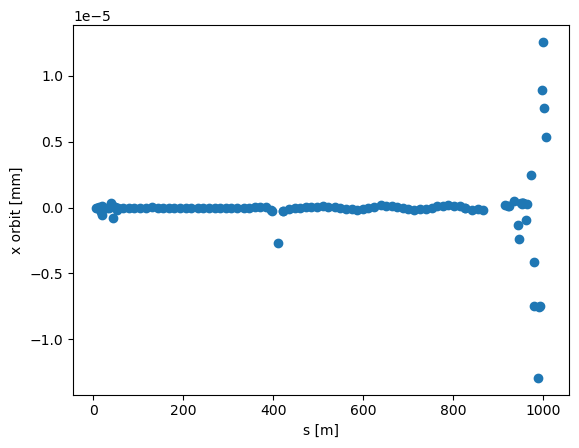

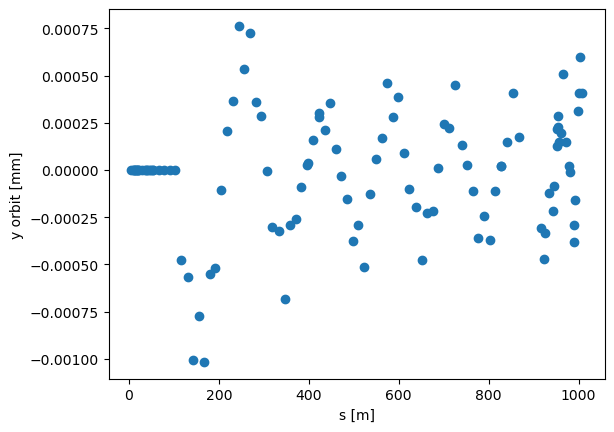

In [23]:
fig, ax = plt.subplots()

ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    [getActualXOffset(tao,ele) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()


fig, ax = plt.subplots()
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    [getActualYOffset(tao,ele) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("y orbit [mm]")
plt.show()

In [24]:
def makeYPerturbationMatrix(delta, trackEnd = "end"):

    referenceRow = np.array( [ getActualYOffset( tao, ele ) for ele in allBPMNames ] )

    #print(referenceRow) 
    
    perturbationMatrix = []
    
    for kicker in allVKickerNames:

        #Tweak the kicker
        setKickerkG( tao, kicker, delta + getKickerkG( tao, kicker ) )

        trackBeam(tao, 
          trackEnd = trackEnd,
          **importedDefaultSettings
         )

        perturbationRow = np.array( [ getActualYOffset( tao, ele ) for ele in allBPMNames ] ) - referenceRow

        perturbationMatrix.append(perturbationRow) 

        #Put it back where it started
        setKickerkG( tao, kicker, -1 * delta + getKickerkG( tao, kicker ) )

    #Normalize
    perturbationMatrix = np.array(perturbationMatrix) / delta
    
    return perturbationMatrix

In [25]:
yPerturbationMatrix = makeYPerturbationMatrix( 1e-6 , trackEnd = evalElement ) 

In [26]:
yKickerChanges = solveForKickerCorrectionsBounded(
    yPerturbationMatrix,
    [ getActualYOffset( tao, ele ) for ele in allBPMNames ],
    bound = 0.1
)

In [27]:
for kicker, change in zip(allVKickerNames, yKickerChanges):
    setKickerkG(tao, kicker, getKickerkG(tao, kicker) + change)

In [28]:
trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_14685102052444413911.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_14685102052444413911.h5
Loaded /tmp/beams/patchBeamFile_14685102052444413911.h5
Set track_start = ENDDL10, track_end = BEGBC20
Tracking!
trackBeam() exiting


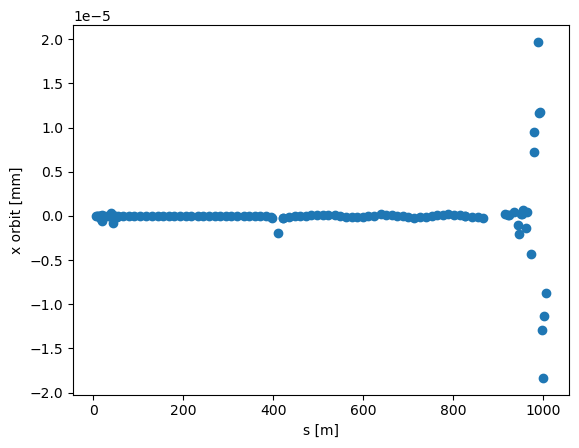

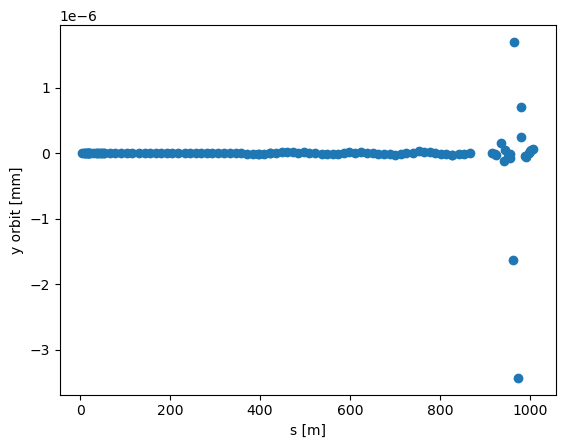

In [29]:
fig, ax = plt.subplots()

ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    [getActualXOffset(tao,ele) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()


fig, ax = plt.subplots()
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    [getActualYOffset(tao,ele) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("y orbit [mm]")
plt.show()